In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split

import  torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

In [2]:
data_path_train="static/train/"

In [3]:
data_path_test="static/test/"


In [4]:
img_size=120
img_transform=transforms.Compose([transforms.Resize((img_size,img_size)),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.475],std=[0.229,0.224,0.225])])

In [5]:
train_data=ImageFolder(root=data_path_train,transform=img_transform)
test_data=ImageFolder(root=data_path_test,transform=img_transform)

In [6]:
len(train_data),len(test_data)

(251, 66)

In [7]:
train_data.class_to_idx

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [8]:
val_data,test_data=random_split(test_data,[50,16])

In [9]:
len(val_data),len(test_data)

(50, 16)

In [10]:
train_loader=DataLoader(train_data,batch_size=50,shuffle=True)
val_loader=DataLoader(val_data,batch_size=50,shuffle=True)

In [11]:
for img,label in train_loader:
    print(img.shape)
    break

torch.Size([50, 3, 120, 120])


In [12]:
def show_img(data):
    for img,label in data:
        plt.figure(figsize=(10,10))
        plt.imshow(make_grid(img,nrow=5).permute(1,2,0))
        plt.show()
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


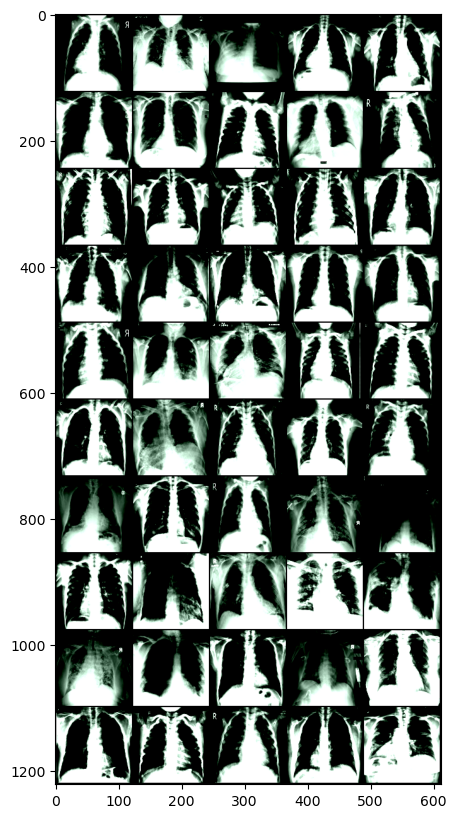

In [13]:
show_img(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


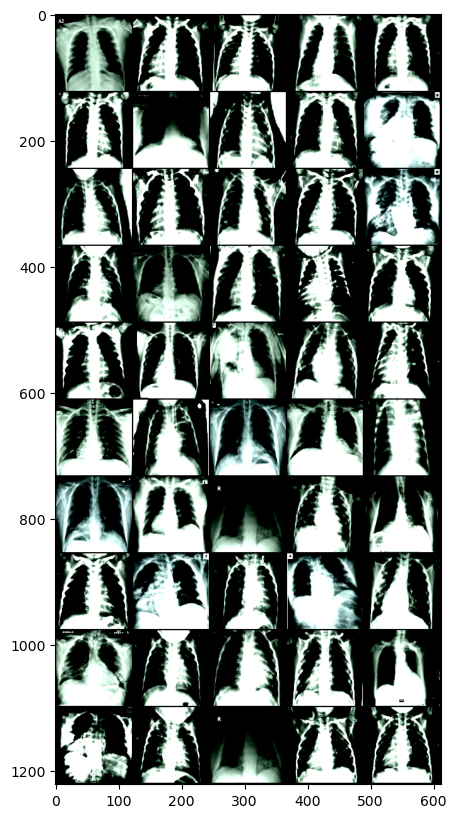

In [14]:
show_img(val_loader)

In [15]:
class ANN(nn.Module):
    def __init__(self,hidden_layer=64):
        super(ANN,self).__init__()
        self.fc1=nn.Linear(120*120*3,hidden_layer)
        self.fc2=nn.Linear(hidden_layer,3)
        self.relu=nn.ReLU()
    def forward(self,img):
        out=img.view(-1,120*120*3)
        out=self.fc1(out)
        out=self.relu(out)
        out=self.fc2(out)
        return out
        

In [16]:
model=ANN()
print(model.parameters)

<bound method Module.parameters of ANN(
  (fc1): Linear(in_features=43200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)>


In [17]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [18]:
import matplotlib.pyplot as plt

def train(model,  loss_fn, optimizer):
    epochs=15
    training_loss = []
    training_acc = []
    validation_loss = []
    validation_acc = []
    
    for epoch in range(epochs):
        train_loss = 0.0
        train_acc = 0.0
        model.train()
        
        # Training loop
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = loss_fn(output, labels)
            loss.backward()
            optimizer.step()
            
            predictions = torch.argmax(output, 1)
            train_acc += (predictions == labels).sum().item()
            train_loss += loss.item()
        
        training_acc.append(train_acc / len(train_loader.dataset))
        training_loss.append(train_loss / len(train_loader))
        
        # Validation loop
        val_loss = 0.0
        val_acc = 0.0
        model.eval()
        
        with torch.no_grad():
            for images, labels in val_loader:
                output = model(images)
                loss = loss_fn(output, labels)
                
                predictions = torch.argmax(output, 1)
                val_acc += (predictions == labels).sum().item()
                val_loss += loss.item()
        
        validation_acc.append(val_acc / len(val_loader.dataset))
        validation_loss.append(val_loss / len(val_loader))
        
        # Print epoch statistics
        print('Epoch {}, Training Loss: {:.4f}, Training Acc: {:.4f}, Validation Loss: {:.4f}, Validation Acc: {:.4f}'
              .format(epoch + 1, train_loss / len(train_loader), train_acc / len(train_loader.dataset),
                      val_loss / len(val_loader), val_acc / len(val_loader.dataset)))
    
    plt.title('Accuracy vs Epoch')
    plt.plot(range(epochs),training_acc,label='training accuracy')
    plt.plot(range(epochs),validation_acc,label='validation accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Training\Validation Accuracy')
    plt.show()
    
    
    plt.title('Loss vs Epoch')
    plt.plot(range(epochs),training_loss,label='training loss')
    plt.plot(range(epochs),validation_loss,label='validation loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Training\Validation loss')
    plt.show()

Epoch 1, Training Loss: 0.6911, Training Acc: 0.6972, Validation Loss: 1.5479, Validation Acc: 0.3800
Epoch 2, Training Loss: 0.6055, Training Acc: 0.7649, Validation Loss: 0.5401, Validation Acc: 0.7200
Epoch 3, Training Loss: 0.3608, Training Acc: 0.8685, Validation Loss: 0.4502, Validation Acc: 0.8000
Epoch 4, Training Loss: 0.2748, Training Acc: 0.8964, Validation Loss: 0.4554, Validation Acc: 0.7400
Epoch 5, Training Loss: 0.2774, Training Acc: 0.9004, Validation Loss: 0.4339, Validation Acc: 0.8400
Epoch 6, Training Loss: 0.2381, Training Acc: 0.9124, Validation Loss: 0.4316, Validation Acc: 0.8600
Epoch 7, Training Loss: 0.2540, Training Acc: 0.9203, Validation Loss: 0.8726, Validation Acc: 0.6600
Epoch 8, Training Loss: 0.3235, Training Acc: 0.8606, Validation Loss: 0.3940, Validation Acc: 0.8200
Epoch 9, Training Loss: 0.2112, Training Acc: 0.9163, Validation Loss: 0.3800, Validation Acc: 0.8200
Epoch 10, Training Loss: 0.1926, Training Acc: 0.9323, Validation Loss: 0.3684, Va

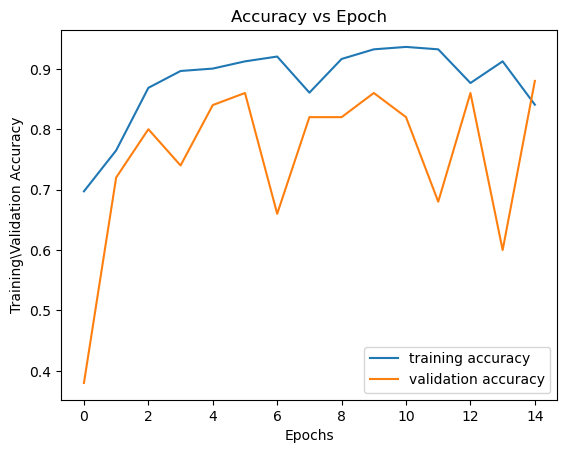

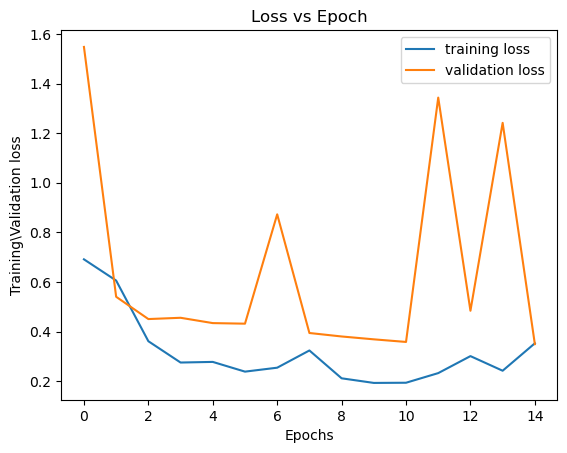

In [19]:
# Assuming train_loader, val_loader, loss_fn, optimizer are defined

# Train the model
train(model,loss_fn, optimizer)


In [20]:
def predict_img(img,model):
    x=img.unsqueeze(0)
    y=model(x)
    pred=torch.argmax(y,dim=1)
    return train_data.classes[pred]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


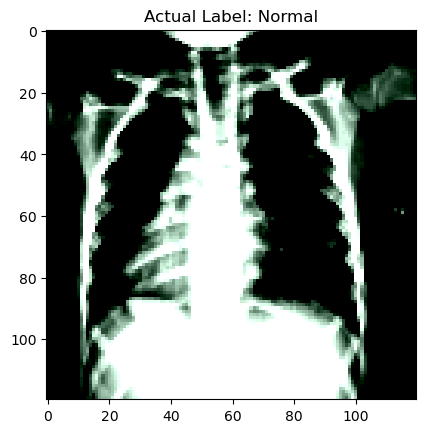

Actual Label: Normal Prediction label: Normal


In [21]:
import torch
import matplotlib.pyplot as plt

# Assuming test_data, train_data, and predict_img are defined

# Function to make a prediction on a single image
def predict_img(img, model):
    model.eval()
    with torch.no_grad():
        img = img.unsqueeze(0)  # Add batch dimension
        output = model(img)
        prediction = torch.argmax(output, 1)
    return prediction.item()

# Get an image and its label from the test dataset
img, label = test_data[2]

# Display the image
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Actual Label: {train_data.classes[label]}')
plt.show()

# Predict the label for the image using the model
predicted_label = predict_img(img, model)
print('Actual Label:', train_data.classes[label], 'Prediction label:', train_data.classes[predicted_label])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


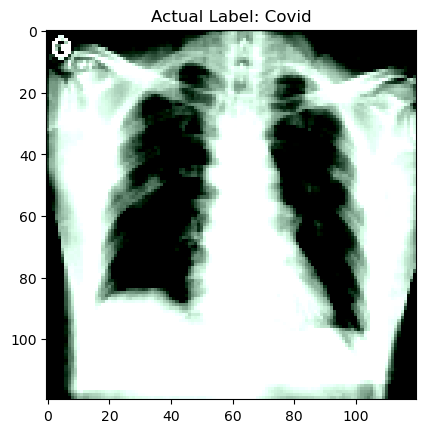

Actual Label: Covid Prediction label: Covid


In [22]:
img, label = test_data[10]

# Display the image
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Actual Label: {train_data.classes[label]}')
plt.show()

# Predict the label for the image using the model
predicted_label = predict_img(img, model)
print('Actual Label:', train_data.classes[label], 'Prediction label:', train_data.classes[predicted_label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


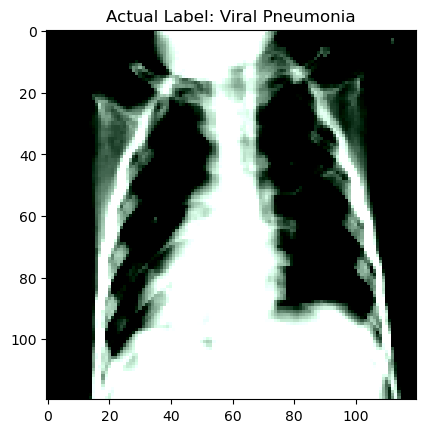

Actual Label: Viral Pneumonia Prediction label: Viral Pneumonia


In [23]:
img, label = test_data[15]

# Display the image
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Actual Label: {train_data.classes[label]}')
plt.show()

# Predict the label for the image using the model
predicted_label = predict_img(img, model)
print('Actual Label:', train_data.classes[label], 'Prediction label:', train_data.classes[predicted_label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


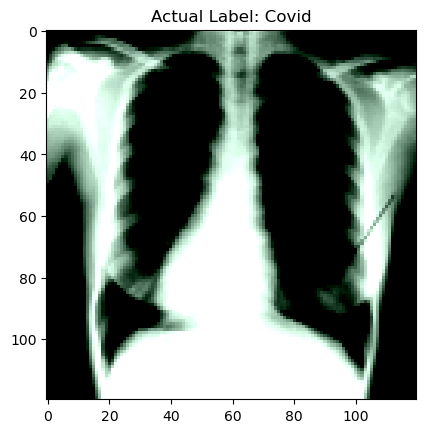

Actual Label: Covid Prediction label: Normal


In [24]:

img, label = test_data[14]

# Display the image
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Actual Label: {train_data.classes[label]}')
plt.show()

# Predict the label for the image using the model
predicted_label = predict_img(img, model)
print('Actual Label:', train_data.classes[label], 'Prediction label:', train_data.classes[predicted_label])

In [25]:
len(test_data)

16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


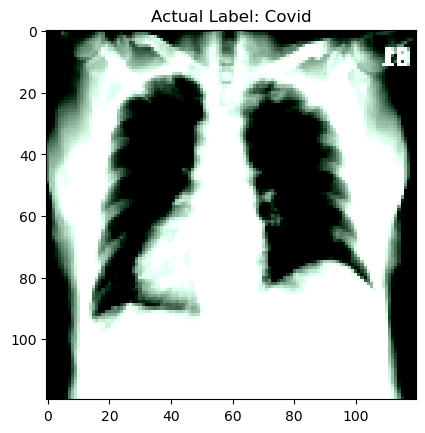

Actual Label: Covid Prediction label: Covid


In [26]:
img, label = val_data[40]

# Display the image
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Actual Label: {train_data.classes[label]}')
plt.show()

# Predict the label for the image using the model
predicted_label = predict_img(img, model)
print('Actual Label:', train_data.classes[label], 'Prediction label:', train_data.classes[predicted_label])

In [27]:
import torch

# Assuming your model is called 'model'
torch.save(model.state_dict(), 'project_model.pth')
